
# Tabular Regression with scikit-learn

This example shows how you can create a Hugging Face Hub compatible repo for a
tabular regression task using scikit-learn. We also show how you can generate
a model card for the model and the task at hand.


## Imports
First we will import everything required for the rest of this document.



In [1]:
from pathlib import Path
from tempfile import mkdtemp, mkstemp

import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import skops.io as sio
from skops import card

## Data
We will use diabetes dataset from sklearn.



In [5]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Train a Model
To train a model, we need to convert our data first to vectors. We will use
StandardScalar in our pipeline. We will fit a Linear Regression model with
the outputs of the scalar.



In [6]:
model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("linear_regression", LinearRegression()),
    ]
)

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

## Inference
Let's see if the model works.



In [7]:
y_pred = model.predict(X_test[:5])
print(y_pred)

[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]


## Initialize a repository to save our files in
We will now initialize a repository and save our model



In [16]:
#_, pkl_name = mkstemp(prefix="skops-", suffix=".pkl")

# with open(pkl_name, mode="bw") as f:
#    sio.dump(model, file=f)

# local_repo = mkdtemp(prefix="skops-")

from datetime import datetime
import os

datestring = datetime.now().strftime("%Y%m%d%H")
local_repo = Path("../model-cards-examples") / datestring
local_repo.mkdir(exist_ok=True)

## Create a model card
We now create a model card. We will see below how we can populate the model
card with useful information.



In [11]:
model_card = card.Card(model)

## Add more information
So far, the model card does not tell viewers a lot about the model. Therefore,
we add more information about the model, like a description and what its
license is.



In [12]:
limitations = (
    "This model is made for educational purposes and is not ready to be used in"
    " production."
)
model_description = (
    "This is a Linear Regression model trained on diabetes dataset. This model could be"
    " used to predict the progression of diabetes. This model is pretty limited and"
    " should just be used as an example of how to user `skops` and Hugging Face Hub."
)
model_card_authors = "skops_user, lazarust"
citation_bibtex = "bibtex\n@inproceedings{...,year={2022}}"
model_card.add(
    folded=False,
    **{
        "Model Card Authors": model_card_authors,
        "Intended uses & limitations": limitations,
        "Citation": citation_bibtex,
        "Model description": model_description,
        "Model description/Intended uses & limitations": limitations,
    },
)

Card(
  model=Pipeline(steps=[('scaler', Standar..._regression', LinearRegression())]),
  Model description=This is a Linear Regression ...`skops` and Hugging Face Hub.,
  Model description/Intended uses & limitations=This model is ... in production.,
  Model description/Training Procedure/Hyperparameters=TableSection(12x2),
  Model description/Training Procedure/Model Plot=<style>#sk-co...v></div></div>,
  Model Card Authors=skops_user, lazarust,
  Citation=bibtex @inproceedings{...,year={2022}},
  Intended uses & limitations=This model is made for ...o be used in production.,
)

## Add plots, metrics, and tables to our model card
We will now evaluate our model and add our findings to the model card.



Card(
  model=Pipeline(steps=[('scaler', Standar..._regression', LinearRegression())]),
  Model description=This is a Linear Regression ...`skops` and Hugging Face Hub.,
  Model description/Intended uses & limitations=This model is ... in production.,
  Model description/Training Procedure/Hyperparameters=TableSection(12x2),
  Model description/Training Procedure/Model Plot=<style>#sk-co...v></div></div>,
  Model description/Evaluation Results=TableSection(3x2),
  Model Card Authors=skops_user, lazarust,
  Citation=bibtex @inproceedings{...,year={2022}},
  Intended uses & limitations=This model is made for ...o be used in production.,
  Prediction Scatter=PlotSection(prediction_scatter.png),
)

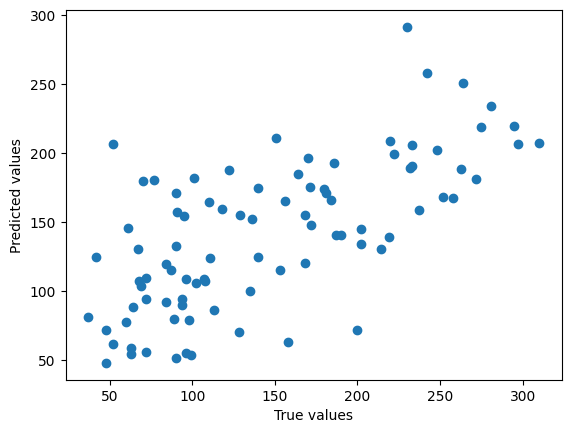

In [13]:
y_pred = model.predict(X_test)

# plot the predicted values against the true values
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.savefig(Path(local_repo) / "prediction_scatter.png")
model_card.add_plot(**{"Prediction Scatter": "prediction_scatter.png"})

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_card.add_metrics(
    **{"Mean Absolute Error": mae, "Mean Squared Error": mse, "R-Squared Score": r2}
)

## Save model card
We can simply save our model card by providing a path to :meth:`.Card.save`.
The model hasn't been pushed to Hugging Face Hub yet, if you want to see how
to push your models please refer to
`this example <sphx_glr_auto_examples_plot_hf_hub.py>`.



In [17]:
model_card.save(Path(local_repo) / "README_plot_tabular_regression.md")